## Fundamentals of Data Analysis Project
#### Hayley Doherty G00387849
---

The aim of this project is to perform linear regression on a given dataset such that it will allow the accurate prediction of power output from wind speed values.  Linear regression is a method used to model the relatioship between a response and one or more explanatory variables [1].  If two variables are related, this means that when one changes by a certain amount, the other also changes by a certain amount.  When written in terms of x and y, with y being the response variable, this relationship is described as the regression of y on x.  In this context, the term regression measn that y is a function of x and changes with x [2].  

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()

In [3]:
df = pd.read_csv('powerproduction.csv')
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [77]:
x = df['speed']
x = np.array(x)
x = rng.permutation(x)
x

array([ 6.982, 17.818,  5.506, 20.22 ,  1.001, 19.795, 16.917,  7.558,
        9.309, 10.135,  9.434, 19.82 , 14.59 , 19.67 , 10.711,  3.904,
       10.736, 11.787, 20.646, 15.115,  5.205,  5.781,  5.706, 16.241,
       19.044,  3.929, 16.066, 22.147,  5.806,  6.957,  0.225,  0.45 ,
       15.49 , 19.57 , 21.046,  0.626, 19.169, 12.863,  3.504,  0.551,
       17.543,  7.082, 17.317, 17.142, 14.189,  7.883,  6.857, 13.438,
       10.511, 14.74 , 23.323, 10.385, 15.065, 15.741,  3.203, 16.842,
        0.951, 16.366, 23.599, 21.471, 24.85 , 18.268, 22.798, 14.765,
        0.826,  7.232,  3.053, 24.374, 15.34 ,  3.679,  1.552, 15.666,
        6.481, 16.041, 14.715, 16.692, 19.845, 11.386,  1.301, 18.869,
       23.273,  2.027, 16.091,  0.676, 22.998, 21.496,  5.681,  2.853,
       13.564,  5.831, 15.19 , 22.347,  6.732, 18.318, 22.297, 24.775,
        7.207, 14.139,  8.859, 10.085, 19.895,  4.605,  6.607, 16.942,
       14.264,  8.033, 12.563, 13.263, 11.812, 12.162,  0.751, 21.622,
      

In [78]:
y = df['power']
y = np.array(y)
y = rng.permutation(y)
y

array([1.56380e+01, 5.34700e+00, 4.14860e+01, 0.00000e+00, 9.82230e+01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.51730e+01,
       7.39110e+01, 1.53000e+00, 5.39540e+01, 7.24500e+00, 0.00000e+00,
       4.47350e+01, 9.60580e+01, 7.89940e+01, 9.14900e+01, 0.00000e+00,
       1.06208e+02, 9.05460e+01, 1.37740e+01, 5.11490e+01, 9.80780e+01,
       9.73340e+01, 8.85440e+01, 7.21350e+01, 7.97300e+00, 1.03387e+02,
       3.00000e+00, 9.46000e-01, 9.40930e+01, 9.18800e+01, 5.84200e+00,
       6.70000e-02, 4.33100e+00, 2.27000e+00, 6.94700e+00, 6.65600e+00,
       9.82790e+01, 9.31050e+01, 6.67000e-01, 9.42160e+01, 1.73930e+01,
       6.51100e+00, 4.59700e+00, 9.65440e+01, 3.95840e+01, 9.81200e+00,
       9.44890e+01, 4.48800e+01, 9.01710e+01, 1.00322e+02, 1.02644e+02,
       6.33830e+01, 5.18600e+00, 9.96970e+01, 8.91340e+01, 4.45300e+00,
       6.42210e+01, 1.02322e+02, 9.12060e+01, 9.76710e+01, 3.85520e+01,
       4.33400e+00, 8.72850e+01, 3.67870e+01, 5.69600e+00, 5.168

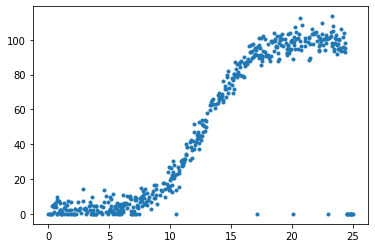

In [7]:
plt.plot(x, y, '.', label = "Data")

In [8]:
coeffs = np.polyfit(x, y, 1)
coeffs

array([  4.91759567, -13.89990263])

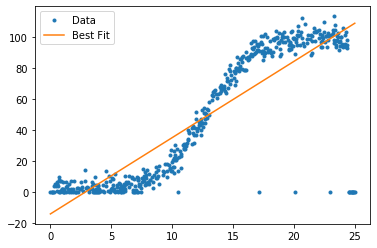

In [10]:
plt.plot(x, y, '.', label = "Data")
plt.plot(x, coeffs[0] * x + coeffs[1], '-', label = "Best Fit")
plt.legend()
plt.show()

In [11]:
pred1 = coeffs[0] * 15 + coeffs[1]
pred1

59.86403235055045

The coefficients can be used to calculate an estimate for power output for a given wind speed value (x). 

In [21]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
linreg = LinearRegression()

In [84]:
x_train = x_train.reshape(-1, 1)

In [91]:
x_test = x_test.reshape(-1, 1)

In [85]:
y_train = y_train.reshape(-1, 1)

In [86]:
x.shape, y.shape

((500,), (500,))

In [87]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print(linreg.intercept_)
print(linreg.coef_)
zip('speed', linreg.coef_)

[43.13134209]
[[0.3605025]]


In [92]:
y_pred = linreg.predict(x_test)

In [94]:
from sklearn import metrics

In [95]:
print(metrics.mean_absolute_error(y_test, y_pred))

40.0456311361623


In [96]:
print(metrics.mean_squared_error(y_true, y_pred))

NameError: name 'y_true' is not defined

### References
[1]. Linear Regression, https://en.wikipedia.org/wiki/Linear_regression

[2]. Correlation and Regression, https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression

